In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import (accuracy_score, classification_report, confusion_matrix,
                           mean_squared_error, roc_curve, auc, matthews_corrcoef,
                           precision_score, recall_score, f1_score)
from sklearn.feature_selection import SelectKBest, f_classif, RFE

In [11]:
#@title TASK 1
column_names = ['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
                'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
                'concave_points_mean', 'symmetry_mean', 'fractal_dimension_mean',
                'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
                'compactness_se', 'concavity_se', 'concave_points_se', 'symmetry_se',
                'fractal_dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst',
                'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst',
                'concave_points_worst', 'symmetry_worst', 'fractal_dimension_worst']

df = pd.read_csv('wdbc.data', names=column_names)

df.shape
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [12]:
df.set_index('id', inplace=True)

X = df.drop('diagnosis', axis=1)
y = df['diagnosis']


In [13]:
df.shape
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
id,,,,,,,,,,,,,,,,,,,,,
842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [14]:
df.info()
df.describe()

print(df['diagnosis'].value_counts())

print(df.isnull().sum())

df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})
print(sum(df['diagnosis']==1))
print(sum(df['diagnosis']==0))

<class 'pandas.core.frame.DataFrame'>
Index: 569 entries, 842302 to 92751
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave_points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                 

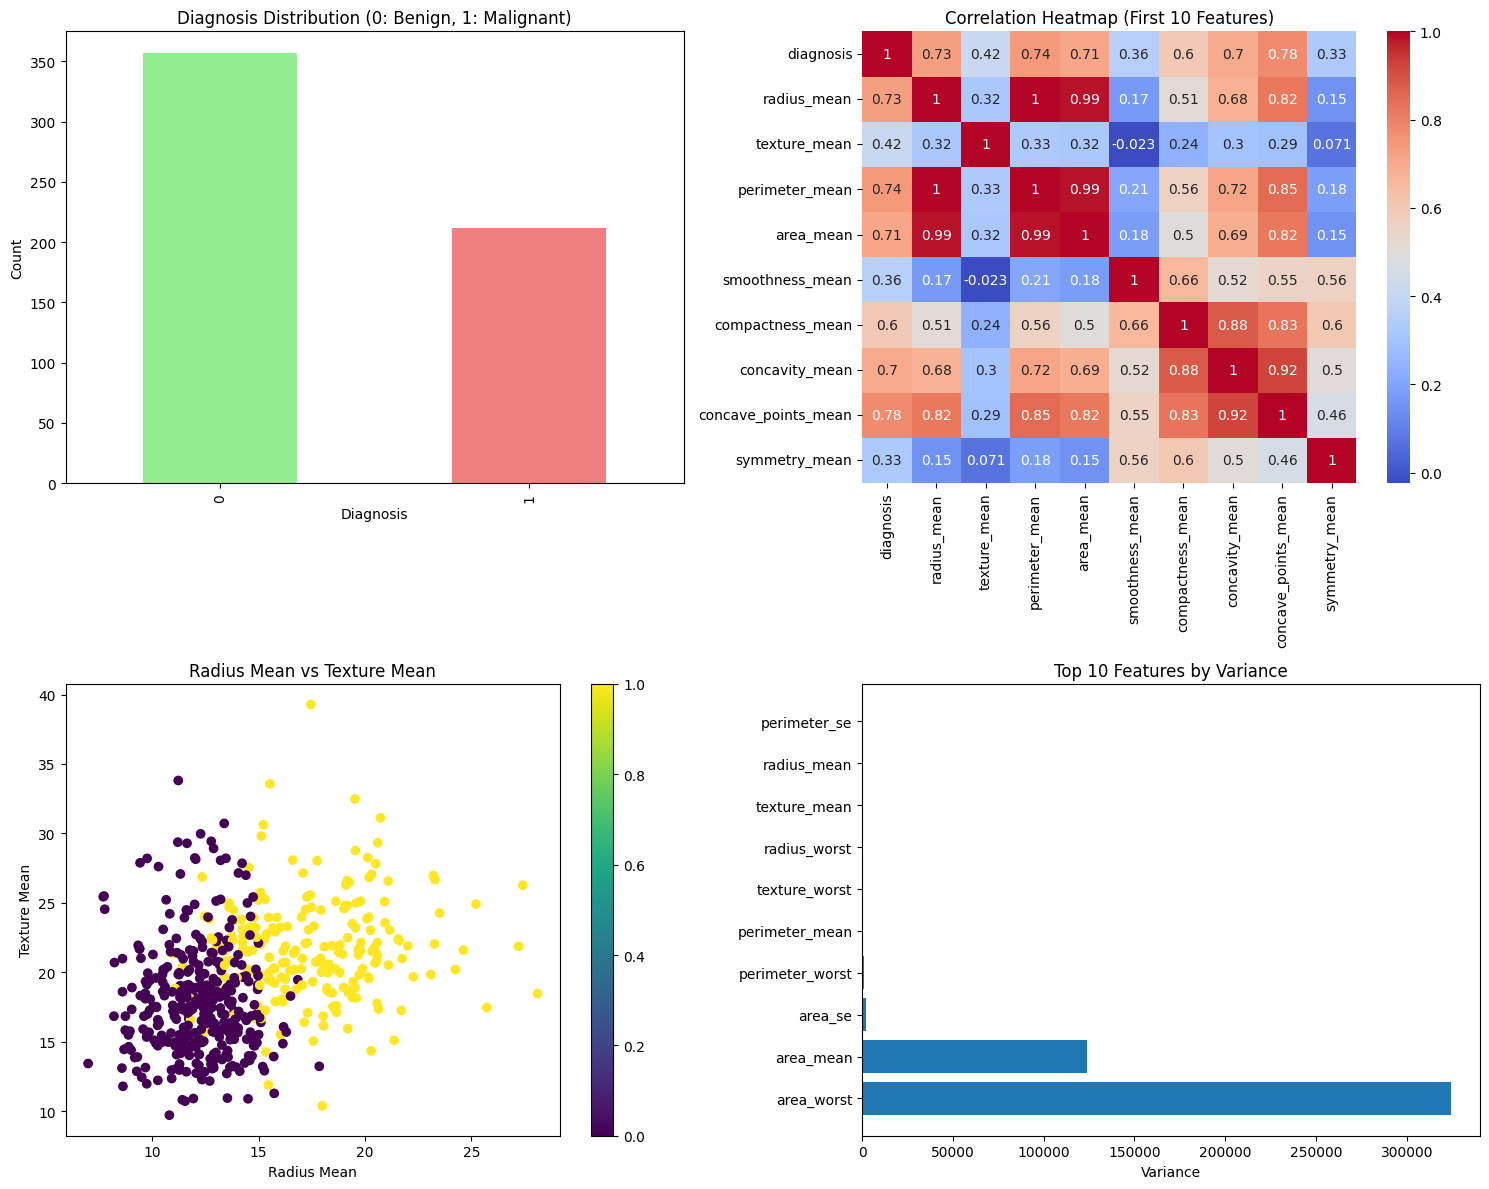

In [15]:
plt.style.use('default')
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

df['diagnosis'].value_counts().plot(kind='bar', ax=axes[0,0], color=['lightgreen', 'lightcoral'])
axes[0,0].set_title('Diagnosis Distribution (0: Benign, 1: Malignant)')
axes[0,0].set_xlabel('Diagnosis')
axes[0,0].set_ylabel('Count')

corr_matrix = df.iloc[:, :10].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', ax=axes[0,1])
axes[0,1].set_title('Correlation Heatmap (First 10 Features)')

scatter = axes[1,0].scatter(df['radius_mean'], df['texture_mean'], c=df['diagnosis'], cmap='viridis')
axes[1,0].set_xlabel('Radius Mean')
axes[1,0].set_ylabel('Texture Mean')
axes[1,0].set_title('Radius Mean vs Texture Mean')
plt.colorbar(scatter, ax=axes[1,0])

feature_variance = df.iloc[:, :-1].var().sort_values(ascending=False)[:10]
axes[1,1].barh(range(len(feature_variance)), feature_variance.values)
axes[1,1].set_yticks(range(len(feature_variance)))
axes[1,1].set_yticklabels(feature_variance.index)
axes[1,1].set_xlabel('Variance')
axes[1,1].set_title('Top 10 Features by Variance')

plt.tight_layout()
plt.show()

In [23]:
if X.isnull().sum().sum() > 0:
    X = X.fillna(X.mean())

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

In [24]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

accuracy_knn = accuracy_score(y_test, y_pred_knn)
mcc_knn = matthews_corrcoef(y_test, y_pred_knn)
conf_knn = confusion_matrix(y_test, y_pred_knn)

print("KNN Accuracy:", accuracy_knn)
print("KNN MCC:", mcc_knn)
print("KNN Confusion Matrix:\n", conf_knn)


KNN Accuracy: 0.9590643274853801
KNN MCC: 0.9118176620711169
KNN Confusion Matrix:
 [[105   3]
 [  4  59]]


In [25]:
svm = SVC(kernel='linear', random_state=42)
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)

accuracy_svm = accuracy_score(y_test, y_pred_svm)
mcc_svm = matthews_corrcoef(y_test, y_pred_svm)
conf_svm = confusion_matrix(y_test, y_pred_svm)

print("SVM Accuracy:", accuracy_svm)
print("SVM MCC:", mcc_svm)
print("SVM Confusion Matrix:\n", conf_svm)


SVM Accuracy: 0.9766081871345029
SVM MCC: 0.9497354497354498
SVM Confusion Matrix:
 [[106   2]
 [  2  61]]


In [26]:
#@title TASK2

#Using ANOVA F-test (SelectKBest)

# Select top 10 features
selector = SelectKBest(score_func=f_classif, k=10)
X_new = selector.fit_transform(X_scaled, y)

selected_features = X.columns[selector.get_support()]
print("Top Features:", selected_features)



Top Features: Index(['radius_mean', 'perimeter_mean', 'area_mean', 'concavity_mean',
       'concave_points_mean', 'radius_worst', 'perimeter_worst', 'area_worst',
       'concavity_worst', 'concave_points_worst'],
      dtype='object')


In [29]:
#@title TASK 3
kernels = ['linear','poly','rbf','sigmoid']

for k in kernels:
    svm = SVC(kernel=k, random_state=42)
    svm.fit(X_train, y_train)
    y_pred = svm.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    mcc = matthews_corrcoef(y_test, y_pred)
    print(f"SVM Kernel: {k} | Accuracy: {acc:.4f} | MCC: {mcc:.4f}")


SVM Kernel: linear | Accuracy: 0.9766 | MCC: 0.9497
SVM Kernel: poly | Accuracy: 0.8947 | MCC: 0.7825
SVM Kernel: rbf | Accuracy: 0.9708 | MCC: 0.9374
SVM Kernel: sigmoid | Accuracy: 0.9649 | MCC: 0.9254


In [30]:
param_grid = {
    'C':[0.1,1,10],
    'gamma':[0.01,0.1,1],
    'kernel':['rbf']
}

grid = GridSearchCV(SVC(), param_grid, cv=5)
grid.fit(X_train, y_train)

print("Best Params:", grid.best_params_)
best_model = grid.best_estimator_
y_pred_best = best_model.predict(X_test)
print("Accuracy with Best Params:", accuracy_score(y_test, y_pred_best))
print("MCC with Best Params:", matthews_corrcoef(y_test, y_pred_best))


Best Params: {'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}
Accuracy with Best Params: 0.9883040935672515
MCC with Best Params: 0.9750124874325203
